<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
iris=load_iris(as_frame=True)  #DataFrame kimi gostermesi ucun asframe yazilir.
X=iris.data[['petal length (cm)','petal width (cm)']].values
y=(iris.target==2)  #Iris virginica

svm_clf=make_pipeline(StandardScaler(),
                      LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
X_new=[[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new) #ne qeder emin oldugunu qaytarir.

array([ 0.66163411, -0.22036063])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

polynomial_svm_clf=make_pipeline(PolynomialFeatures(degree=3),
                                 StandardScaler(),
                                 LinearSVC(C=10,max_iter=10_000,dual=True,random_state=42))

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [ ]:
import matplotlib.pyplot as plt

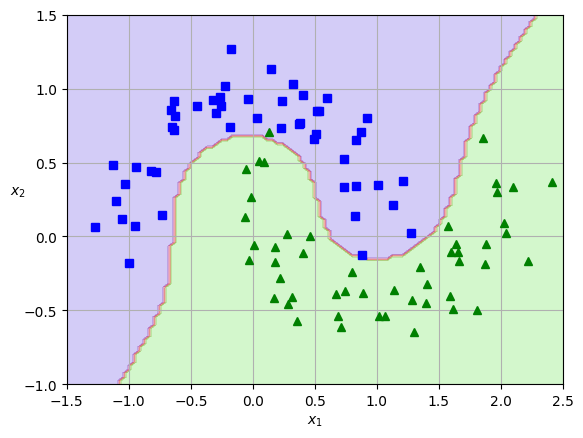

In [ ]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$",rotation=0)

def plot_predictions(clf,axes):
  x0s=np.linspace(axes[0],axes[1],100)
  x1s=np.linspace(axes[2],axes[3],100)
  x0,x1=np.meshgrid(x0s,x1s)
  X=np.c_[x0.ravel(),x1.ravel()] #ravel dimensionlarin sayini 1e getirir.
  y_pred=clf.predict(X).reshape(x0.shape)
  #y_decision=clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
  #plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()


#Polykernel  


In [ ]:
from sklearn.svm import SVC
ploy_kernel_cnm_clf=make_pipeline(StandardScaler(),
                                  SVC(kernel="poly",degree=3,coef0=1,C=5))
ploy_kernel_cnm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

#SVM Regression

In [ ]:
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
X=2*np.random.rand(50,1)
y=4+3*X[:,0]+np.random.randn(50)

svm_reg=make_pipeline(StandardScaler(),
                      LinearSVR(epsilon=0.5,dual=True,random_state=42))
svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])